In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import pandas as pd

pd.set_option('precision', 8)

In [2]:
def fixed_point(f, x0, tol=1e-8):
    erro = 1
    e = np.array([])
    a0 = np.array([x0])

    while erro > tol:
        x1 = f(a0[-1])
        erro = np.abs((x1 - a0[-1]) / x1)
        e = np.append(e, erro)
        a0 = np.append(a0, x1)

    return a0[:-1], e

In [3]:
def newton_raphson(f0, f1, x0, tol=1e-8):
    erro = 1
    e = np.array([])
    ar_x0 = np.array([x0])
    ar_x1 = np.array([])

    while erro > tol:
        xi1 = ar_x0[-1] - f0(ar_x0[-1]) / f1(ar_x0[-1])

        erro = np.abs((xi1 - ar_x0[-1]) / xi1)

        ar_x1 = np.append(ar_x1, xi1)

        ar_x0 = np.append(ar_x0, xi1)
        e = np.append(e, erro)

    return ar_x0[:-1], ar_x1, e

In [4]:
def secant(f, x0, tol=1e-8):
    erro = 1
    e = np.array([erro])
    a0 = np.array([x0])
    a1 = np.array([f(x0)])

    while erro > tol:
        x2 = (a0[-1] * f(a1[-1]) - a1[-1] * f(a0[-1]))/(f(a1[-1])-f(a0[-1]))
        erro = np.abs((x2 - a1[-1])/x2)
        e = np.append(e, erro)
        a0, a1 = np.append(a0, a1[-1]), np.append(a1, x2)

    return a0, a1, e

Comparando os métodos com a equação:
$e^{-x}-x$ = 0


In [5]:
def f(x): return np.exp(-x)-x   #Equação


def f_prime(x): return -np.exp(-x)-1    #Primeira derivada


def g(x): return np.exp(-x)     #x = g(x), x isolado

In [6]:
fp_x, fp_e = fixed_point(g, 0)
sc_x, sc_x1, sc_e = secant(f, 0)
nr_x, nr_x1, nr_e = newton_raphson(f, f_prime, 0)

q1 = pd.DataFrame([fp_x, np.around(fp_e * 100, 2), sc_x, np.around(sc_e * 100, 2), nr_x, np.around(nr_e * 100, 2)])
q1 = q1.T
q1.columns = ['Ponto fixo','Erro', 'Secante','Erro', 'Newton-Raphson', 'Erro']
q1.columns.name = 'Iterações'
q1

Iterações,Ponto fixo,Erro,Secante,Erro,Newton-Raphson,Erro
0,0.00000000,100.00,0.00000000,100.00,0.00000000,100.00
1,1.00000000,171.83,1.00000000,63.21,0.50000000,11.71
2,0.36787944,46.85,0.61269984,8.67,0.56631100,0.15
3,0.69220063,38.31,0.56383839,0.59,0.56714317,0.00
4,0.50047350,17.45,0.56717036,0.00,0.56714329,0.00
5,0.60624354,11.16,0.56714331,0.00,NaN,NaN
6,0.54539579,5.90,0.56714329,0.00,NaN,NaN
7,0.57961234,3.48,NaN,NaN,NaN,NaN
8,0.56011546,1.93,NaN,NaN,NaN,NaN
9,0.57114312,1.11,NaN,NaN,NaN,NaN


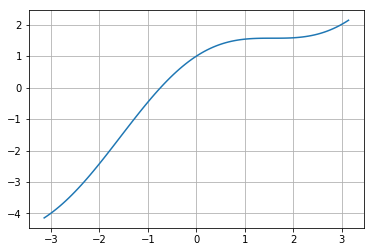

In [20]:
x = np.linspace(-np.pi, np.pi, 100)
plt.plot(x, f1(x))
plt.grid(True)

In [62]:
def f1(x):
    return np.cos(x)+x


opt.fixed_point(f1, -0.9, method='iteration', xtol=1e-2)

1.5707963267927483

In [112]:
def f3(x): return (x**10)-1


def g3(): return 1**(1/10)


def f3_prime(x): return 10*x**9


fp_x, fp_e = fixed_point(g3, 0.5)
sc_x, sc_x1, sc_e = secant(f3,  0.5)
nr_x, nr_x1, nr_e = newton_raphson(f3, f3_prime, 0.5)

q3 = pd.DataFrame([fp_x, np.around(fp_e * 100, 2), sc_x, np.around(sc_e * 100, 2), nr_x, np.around(nr_e * 100, 2)])
q3 = q3.T
q3.columns = ['Ponto fixo', 'Erro', 'Secante','Erro', 'Newton-Raphson', 'Erro']
q3.columns.name = 'Iterações'
q3


Iterações,Ponto fixo,Erro,Secante,Erro,Newton-Raphson,Erro
0,0.5,50.0,0.50000000,100.00,0.50000000,99.03
1,1.0,0.0,-0.99902344,1.45,51.65000000,11.11
2,NaN,NaN,-1.01375580,1.38,46.48500000,11.11
3,NaN,NaN,-0.99994096,0.01,41.83650000,11.11
4,NaN,NaN,-0.99999644,0.00,37.65285000,11.11
5,NaN,NaN,-1.00000000,0.00,33.88756500,11.11
6,NaN,NaN,NaN,NaN,30.49880850,11.11
7,NaN,NaN,NaN,NaN,27.44892765,11.11
8,NaN,NaN,NaN,NaN,24.70403489,11.11
9,NaN,NaN,NaN,NaN,22.23363140,11.11


Questão 4

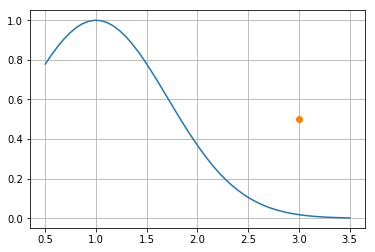

In [2]:
def f4(x): return np.exp(-(x-1)**2)

x = np.linspace(0.5, 3.5)
plt.grid(True)
plt.plot(x, f4(x))

plt.plot
plt.plot(3, 1/2, marker='o')

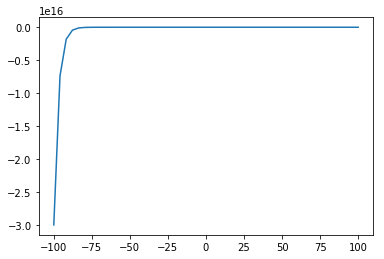

In [22]:
def q5(t, sigma=1/3, A=1):
   
    return A*t*np.exp(-sigma*t)

x = np.linspace(-100, 100)
plt.plot(x, q5(x))